In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
boston = datasets.load_boston()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [53]:
""" converting to df """
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target

In [54]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
""" check for NaN values """ 
print('Size of the dataframe = {}'.format(boston_df.shape))
print(boston_df.isnull().sum())

Size of the dataframe = (506, 14)
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


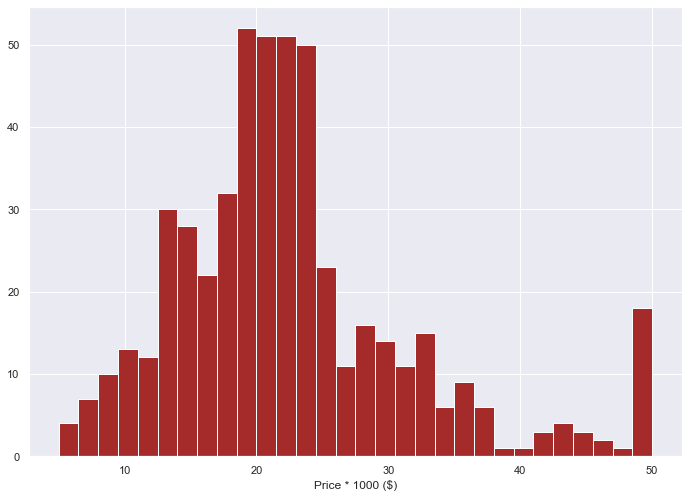

In [56]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plt.hist(boston_df['PRICE'], color='brown', bins=30)
plt.xlabel('Price * 1000 ($)')
plt.show()

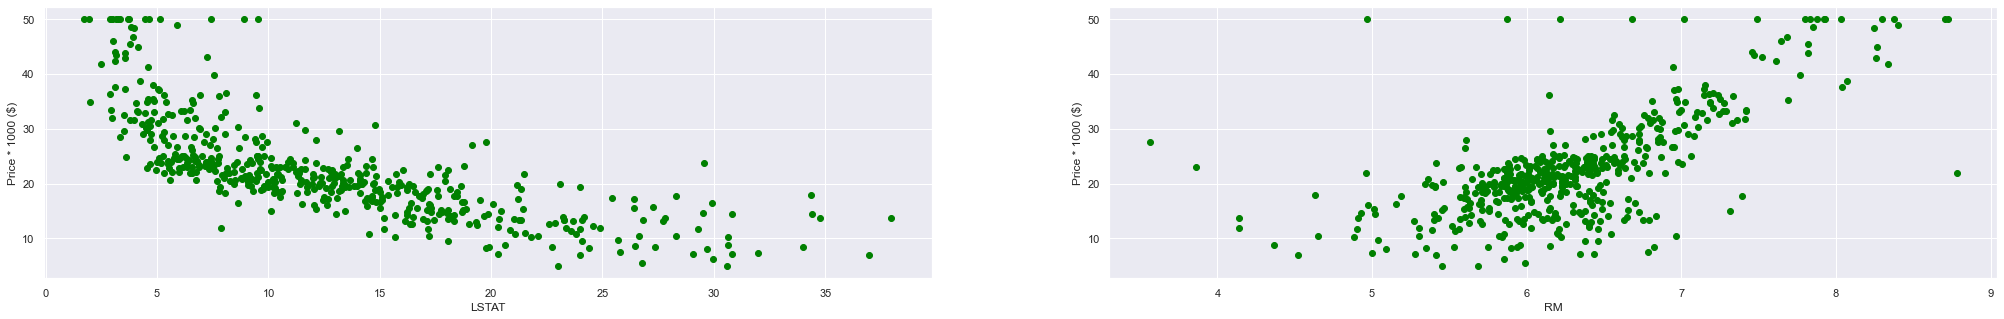

In [61]:
plt.figure(figsize=(35, 5))

features = ['LSTAT', 'RM']
target = boston_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston_df[col]
    y = target
    plt.scatter(x, y, color='green', marker='o')
    plt.xlabel(col); plt.ylabel('Price * 1000 ($)')

In [72]:
""" coorelation between price and room quantity """
x_rooms = boston_df.RM
y_price = boston_df.PRICE

x_rooms = np.array(x_rooms).reshape(-1, 1)
y_price = np.array(y_price).reshape(-1, 1)

X shape = (506, 1)
Y shape = (506, 1)


In [82]:
""" dividing into test and train subsets """
x_train, x_test, y_train, y_test = train_test_split(x_rooms, y_price, test_size=0.2)

print("X train = {}\nY train = {}\nX test = {}\nY test = {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

X train = (404, 1)
Y train = (404, 1)
X test = (102, 1)
Y test = (102, 1)


In [83]:
model = LinearRegression()
model.fit(X=x_train, y=y_train)

estimated_price = model.predict(x_test)
R2 = model.score(x_test, y_test)
# print('*Rooms:\n{}\n*Price test:\n{}\n*Price estimated:\n{}\nModel performance = {}%'.format(x_test, y_test, estimated_price, round(R2*100)))
print('Model perf = {}'.format(round(R2*100)))

*Rooms:
[[6.98 ]
 [6.373]
 [7.802]
 [5.895]
 [5.617]
 [4.906]
 [6.782]
 [5.57 ]
 [5.757]
 [5.787]
 [6.072]
 [7.47 ]
 [6.162]
 [6.245]
 [6.816]
 [7.454]
 [6.63 ]
 [5.693]
 [6.812]
 [6.229]
 [6.242]
 [6.951]
 [5.277]
 [6.762]
 [6.113]
 [6.556]
 [5.648]
 [7.82 ]
 [6.216]
 [6.167]
 [5.782]
 [6.595]
 [5.935]
 [7.203]
 [6.382]
 [4.368]
 [6.302]
 [6.185]
 [6.461]
 [6.604]
 [6.012]
 [5.854]
 [5.965]
 [6.782]
 [6.176]
 [7.107]
 [5.983]
 [6.037]
 [6.041]
 [6.606]
 [5.859]
 [5.036]
 [6.065]
 [6.393]
 [5.727]
 [5.731]
 [6.631]
 [5.613]
 [8.337]
 [7.327]
 [6.167]
 [6.12 ]
 [5.884]
 [6.345]
 [5.565]
 [5.889]
 [5.92 ]
 [6.006]
 [5.412]
 [5.891]
 [5.88 ]
 [7.691]
 [5.813]
 [6.13 ]
 [5.896]
 [6.003]
 [3.863]
 [6.727]
 [5.456]
 [6.121]
 [7.135]
 [5.836]
 [6.273]
 [6.575]
 [6.315]
 [5.531]
 [6.794]
 [6.649]
 [7.061]
 [5.67 ]
 [4.926]
 [5.841]
 [6.957]
 [5.936]
 [5.852]
 [5.851]
 [6.794]
 [6.316]
 [5.926]
 [6.083]
 [6.266]
 [5.875]]
*Price test:
[[29.8]
 [23. ]
 [50. ]
 [18.5]
 [17.2]
 [13.8]
 [ 7.5]
 [13

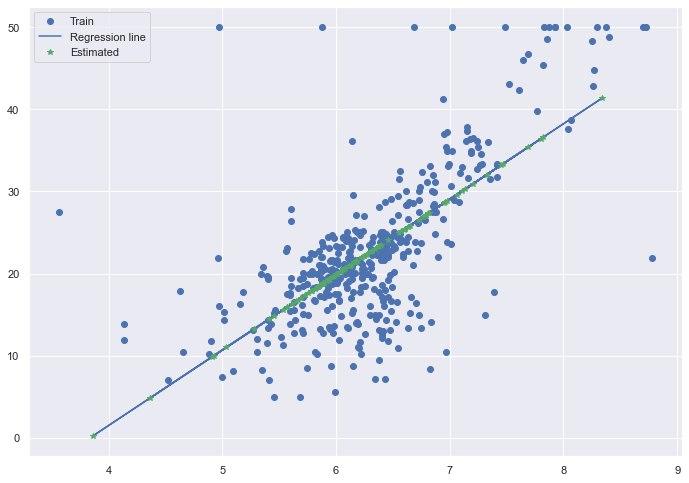

In [84]:
""" visualizing the test and train models """
plt.plot(x_train, y_train, 'ob', label='Train')
plt.plot(x_test, estimated_price, label='Regression line')
plt.plot(x_test, estimated_price, 'g*', label='Estimated')
plt.legend(); plt.show()